In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.19.4 scipy==1.6.3 pandas==1.2.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [3]:
adata = sc.read_text('/Users/matanatmammadli/Desktop/mOocy_rna_rawCounts.txt').transpose()

In [4]:
adata2 = sc.read_text('/Users/matanatmammadli/Desktop/mOocy_rna_rawCounts.txt')

In [5]:
adata

AnnData object with n_obs × n_vars = 223 × 23201

In [6]:
adata.obs_names

Index(['NGO_sc1', 'NGO_sc2', 'NGO_sc3', 'NGO_sc4', 'NGO_sc5', 'NGO_sc6',
       'NGO_sc7', 'NGO_sc8', 'NGO_sc9', 'NGO_sc10',
       ...
       'FGO_sc47', 'FGO_sc48', 'FGO_sc49', 'FGO_sc50', 'FGO_sc51', 'FGO_sc52',
       'FGO_sc53', 'FGO_sc54', 'FGO_sc55', 'FGO_sc56'],
      dtype='object', length=223)

In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 5937 genes that are detected in less than 3 cells


In [8]:
sc.pp.filter_cells(adata2, min_genes=200)
sc.pp.filter_genes(adata2, min_cells=3)

filtered out 18147 cells that have less than 200 genes expressed


In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [10]:
sc.pp.normalize_total(adata2, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [11]:
sc.pp.log1p(adata)

In [12]:
sc.pp.log1p(adata2)

normalizing counts per cell
    finished (0:00:00)


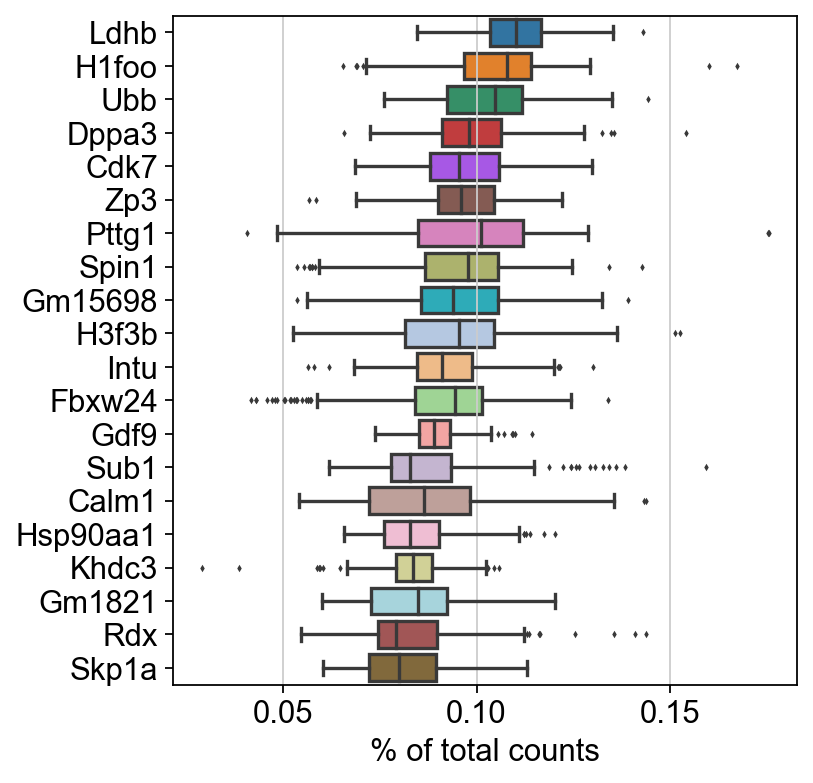

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [14]:
adata.var['mt'] = adata.var_names.str.startswith('Mt')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [15]:
adata2.var['ngo'] = adata2.var_names.str.startswith('NGO') 
sc.pp.calculate_qc_metrics(adata2, qc_vars=['ngo'], percent_top=None, log1p=False, inplace=True)

In [16]:
adata2

AnnData object with n_obs × n_vars = 5054 × 223
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_ngo', 'pct_counts_ngo'
    var: 'n_cells', 'ngo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [17]:
adata2.var_names

Index(['NGO_sc1', 'NGO_sc2', 'NGO_sc3', 'NGO_sc4', 'NGO_sc5', 'NGO_sc6',
       'NGO_sc7', 'NGO_sc8', 'NGO_sc9', 'NGO_sc10',
       ...
       'FGO_sc47', 'FGO_sc48', 'FGO_sc49', 'FGO_sc50', 'FGO_sc51', 'FGO_sc52',
       'FGO_sc53', 'FGO_sc54', 'FGO_sc55', 'FGO_sc56'],
      dtype='object', length=223)

In [18]:
adata2.var['mt'] = adata2.var_names.str.startswith('Mt')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

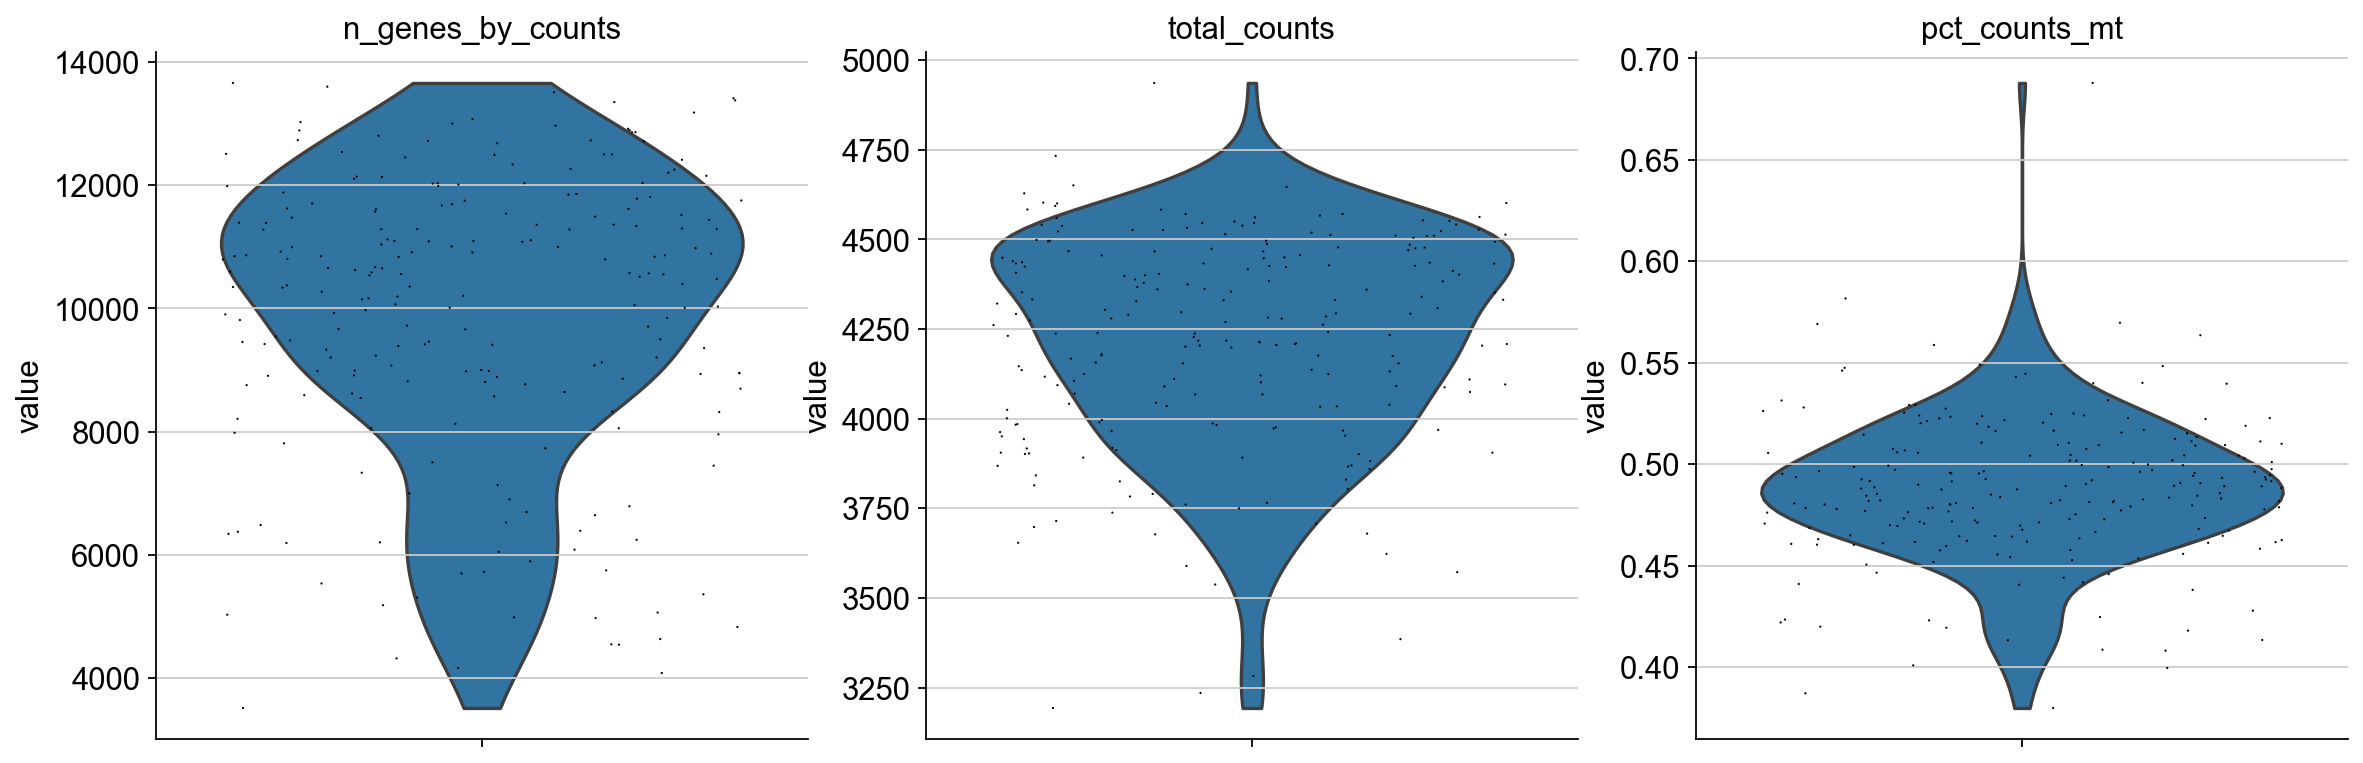

In [19]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

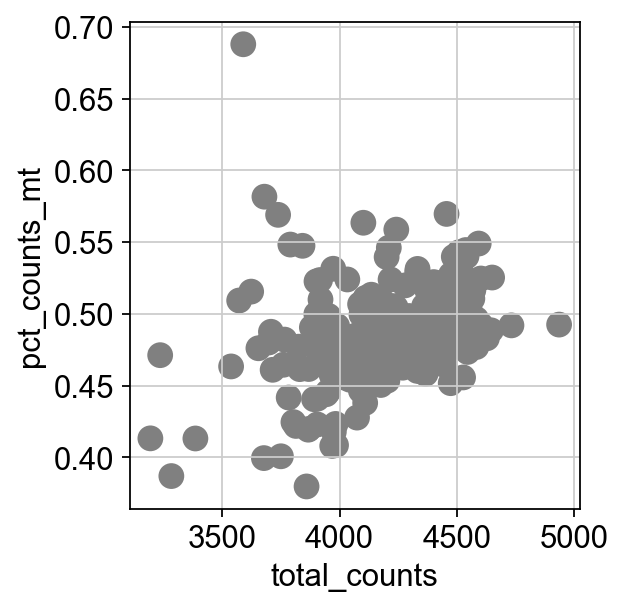

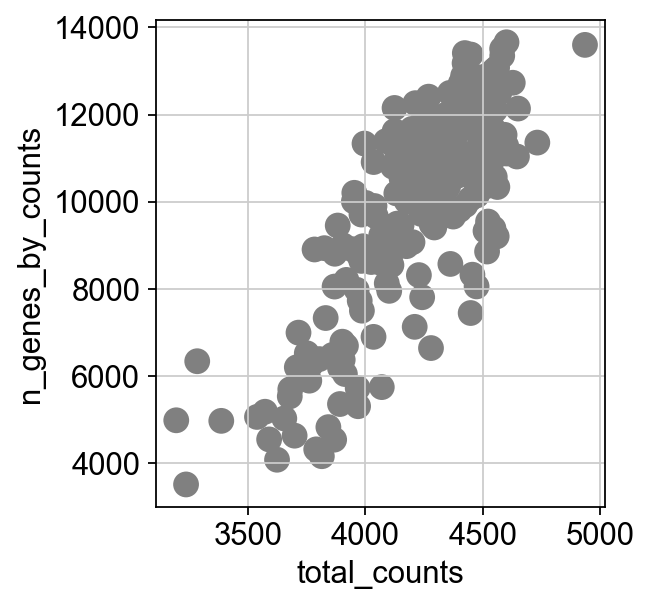

In [20]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [21]:
##adata = adata[adata.obs.n_genes_by_counts < 2500, :]
##adata = adata[adata.obs.pct_counts_mt < 5, :]

In [22]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [23]:
sc.pp.highly_variable_genes(adata2, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


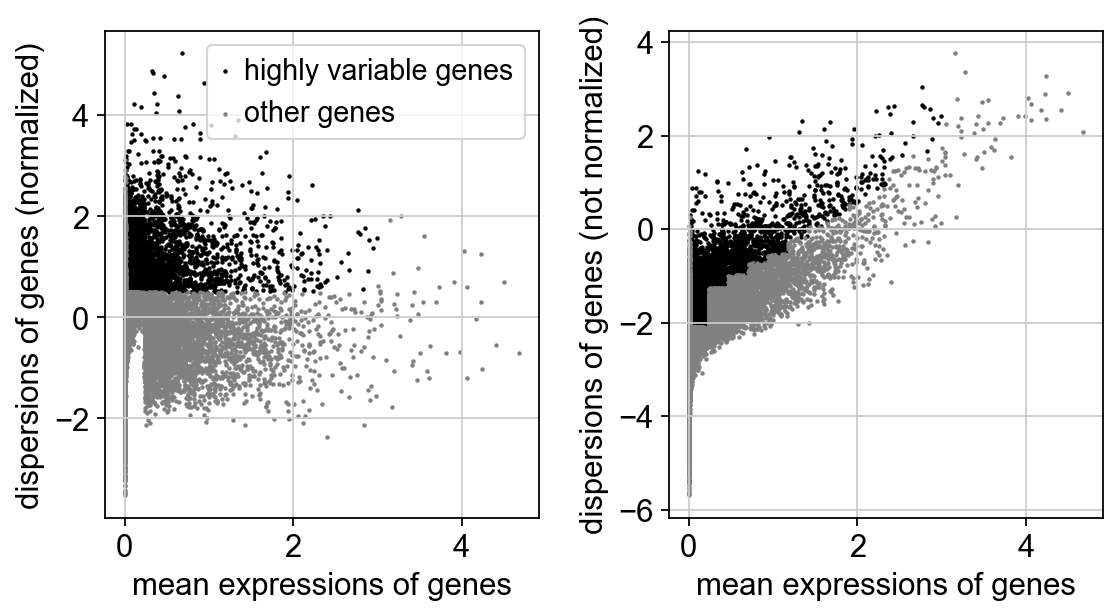

In [24]:
sc.pl.highly_variable_genes(adata)

In [25]:
adata.raw = adata

In [26]:
adata2.raw = adata2

In [27]:
adata = adata[:, adata.var.highly_variable]

In [28]:
adata2 = adata2[:, adata2.var.highly_variable]

In [29]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:08)


In [30]:
sc.pp.regress_out(adata2, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:00)


In [31]:
sc.pp.scale(adata, max_value=10)

In [32]:
sc.pp.scale(adata2, max_value=10)

In [33]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [34]:
sc.tl.pca(adata2, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=27
    finished (0:00:00)


In [35]:
adata

AnnData object with n_obs × n_vars = 223 × 4594
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

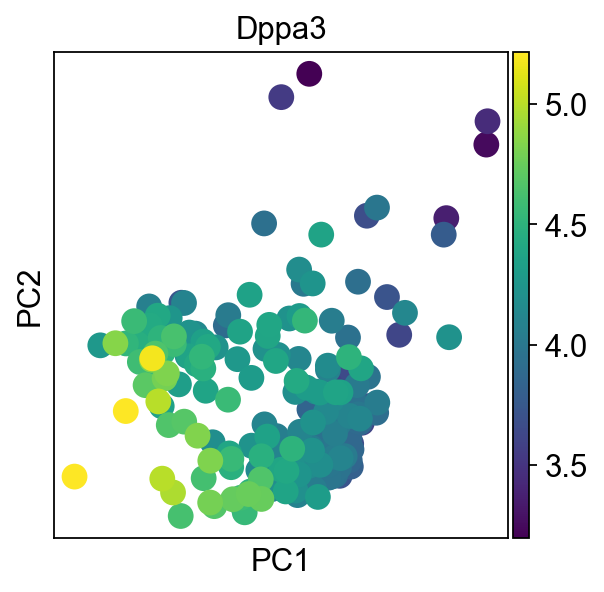

In [36]:
sc.pl.pca(adata, color='Dppa3')   ##scatter plot in the pca coordinates

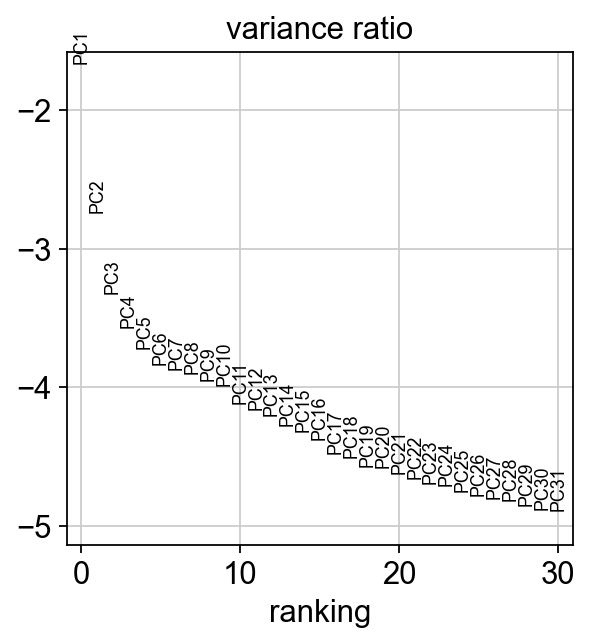

In [37]:
sc.pl.pca_variance_ratio(adata, log=True)

In [38]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [39]:
sc.pp.normalize_total(adata2, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [40]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)  ##compute the neighborhood

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [41]:
sc.pp.neighbors(adata2, n_neighbors=10, n_pcs=40)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [42]:
sc.tl.leiden(adata)  ##Leiden graph clustering method (directly clusters the neighborhood cells

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [43]:
sc.tl.leiden(adata2)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


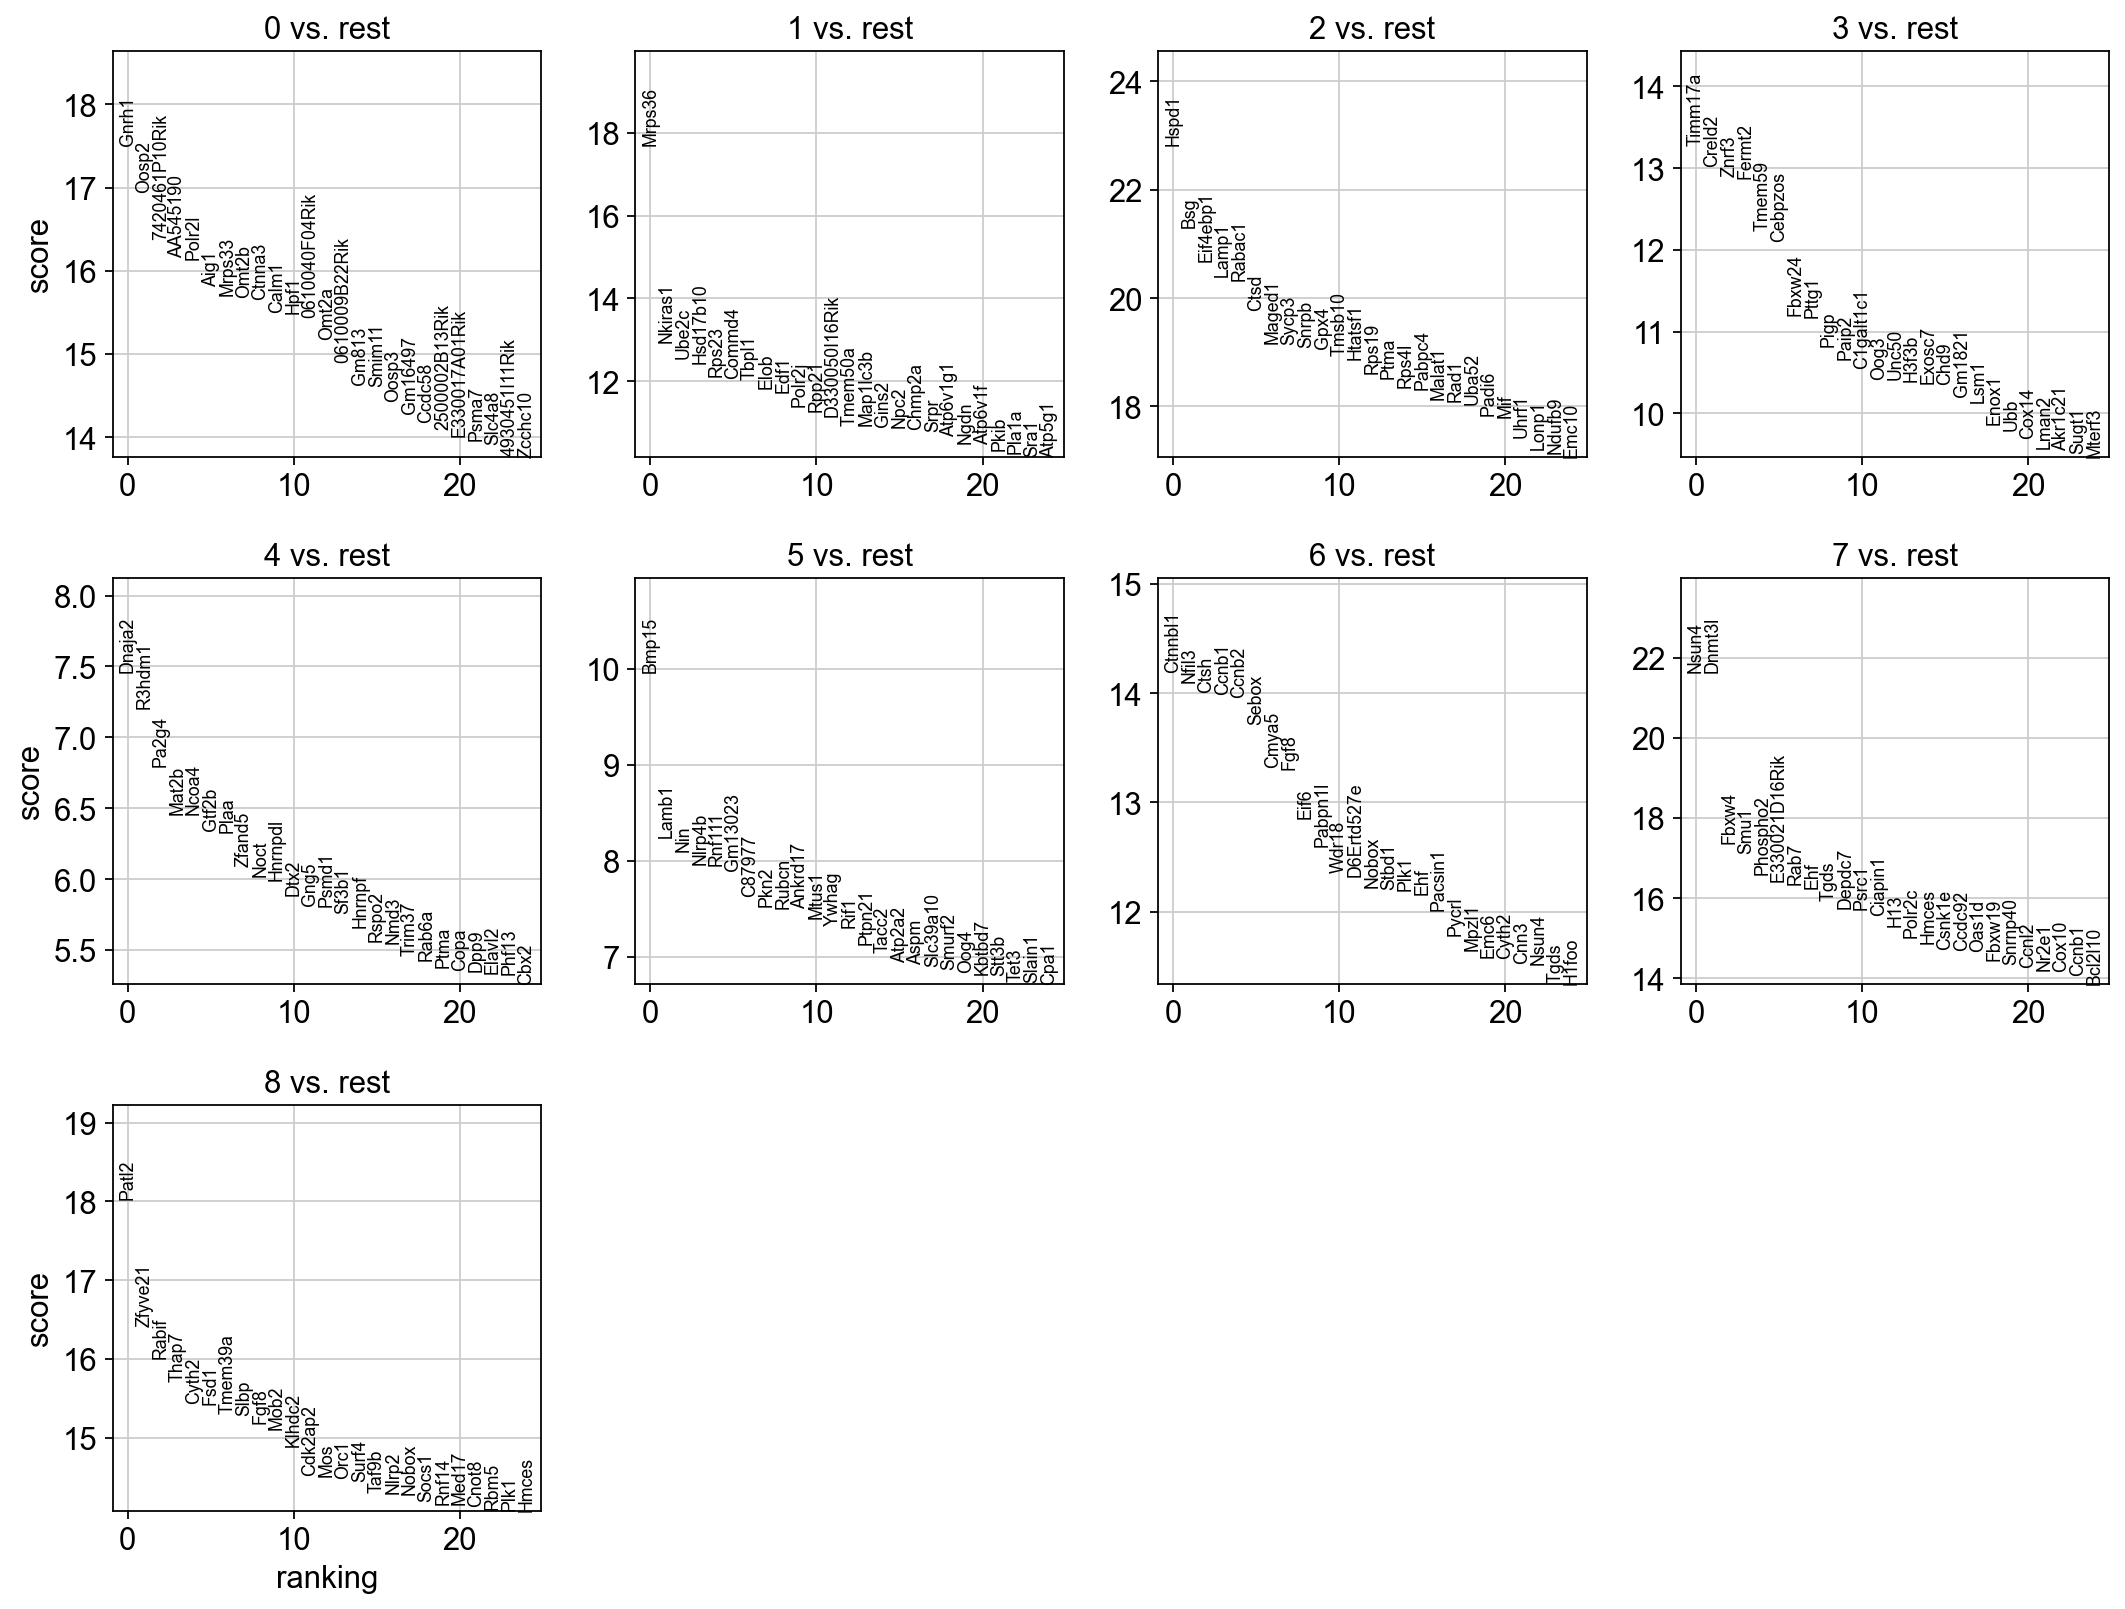

In [44]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')  ##compute ranking for highly differential genes
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)   ## in each cluster

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


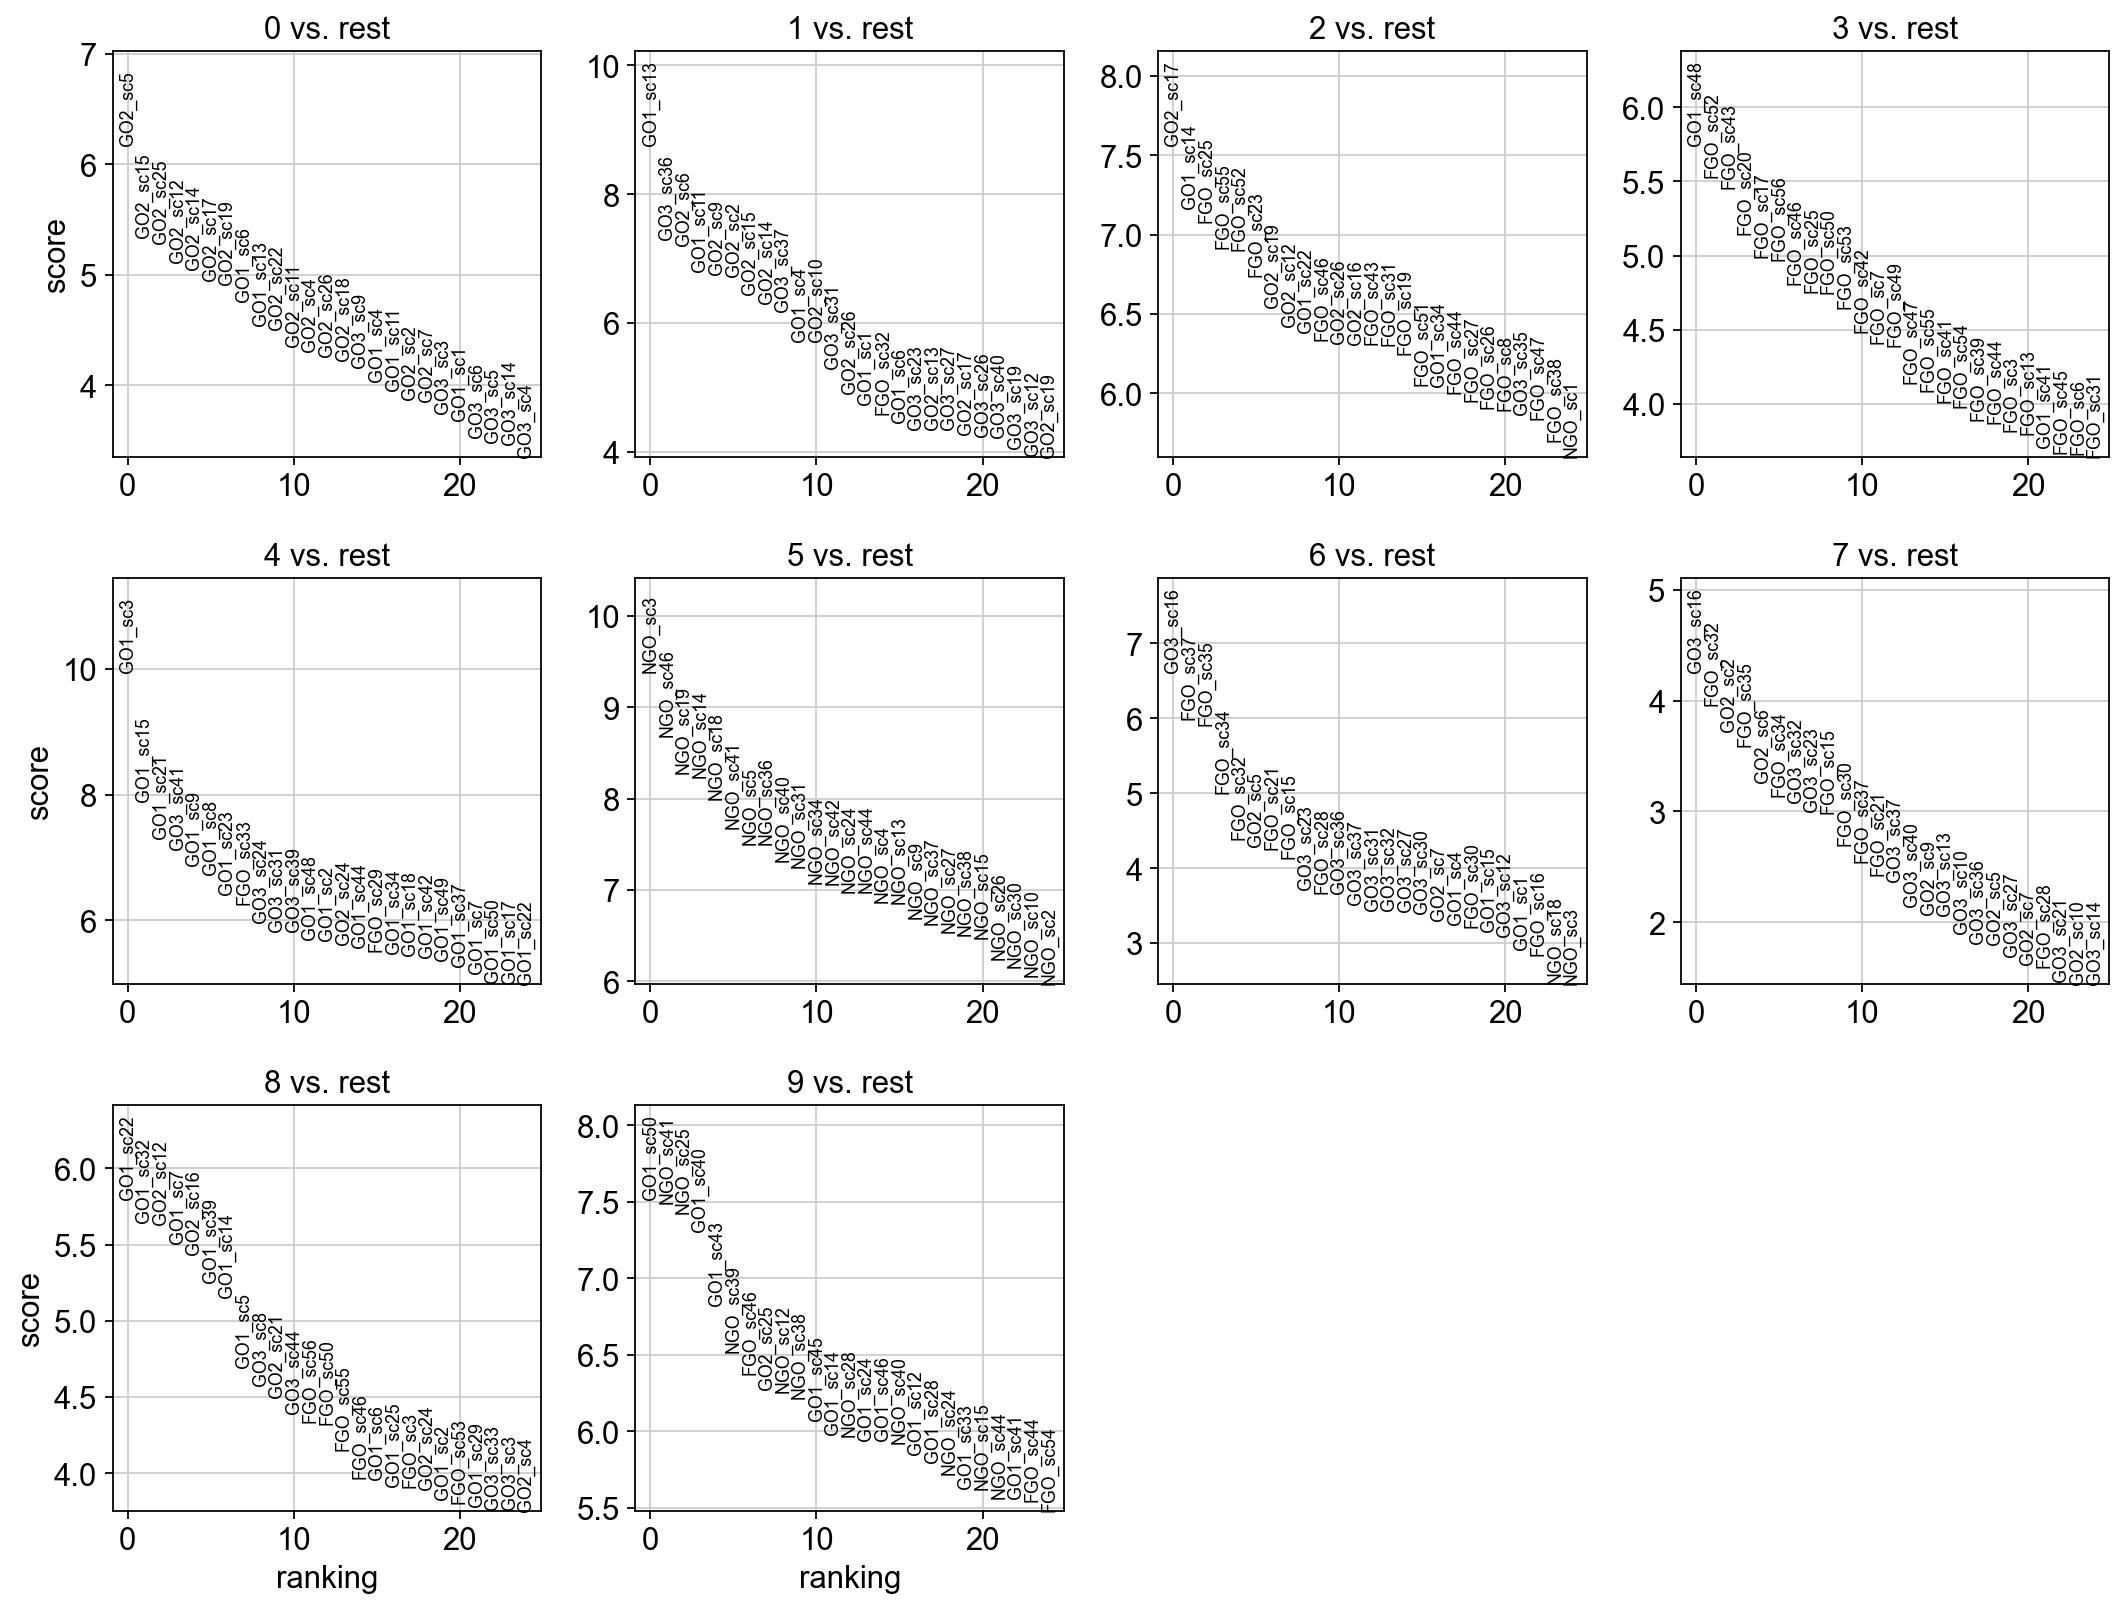

In [45]:
sc.tl.rank_genes_groups(adata2, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata2, n_genes=25, sharey=False)

In [46]:
sc.settings.verbosity = 2 

ranking genes
    finished (0:00:00)


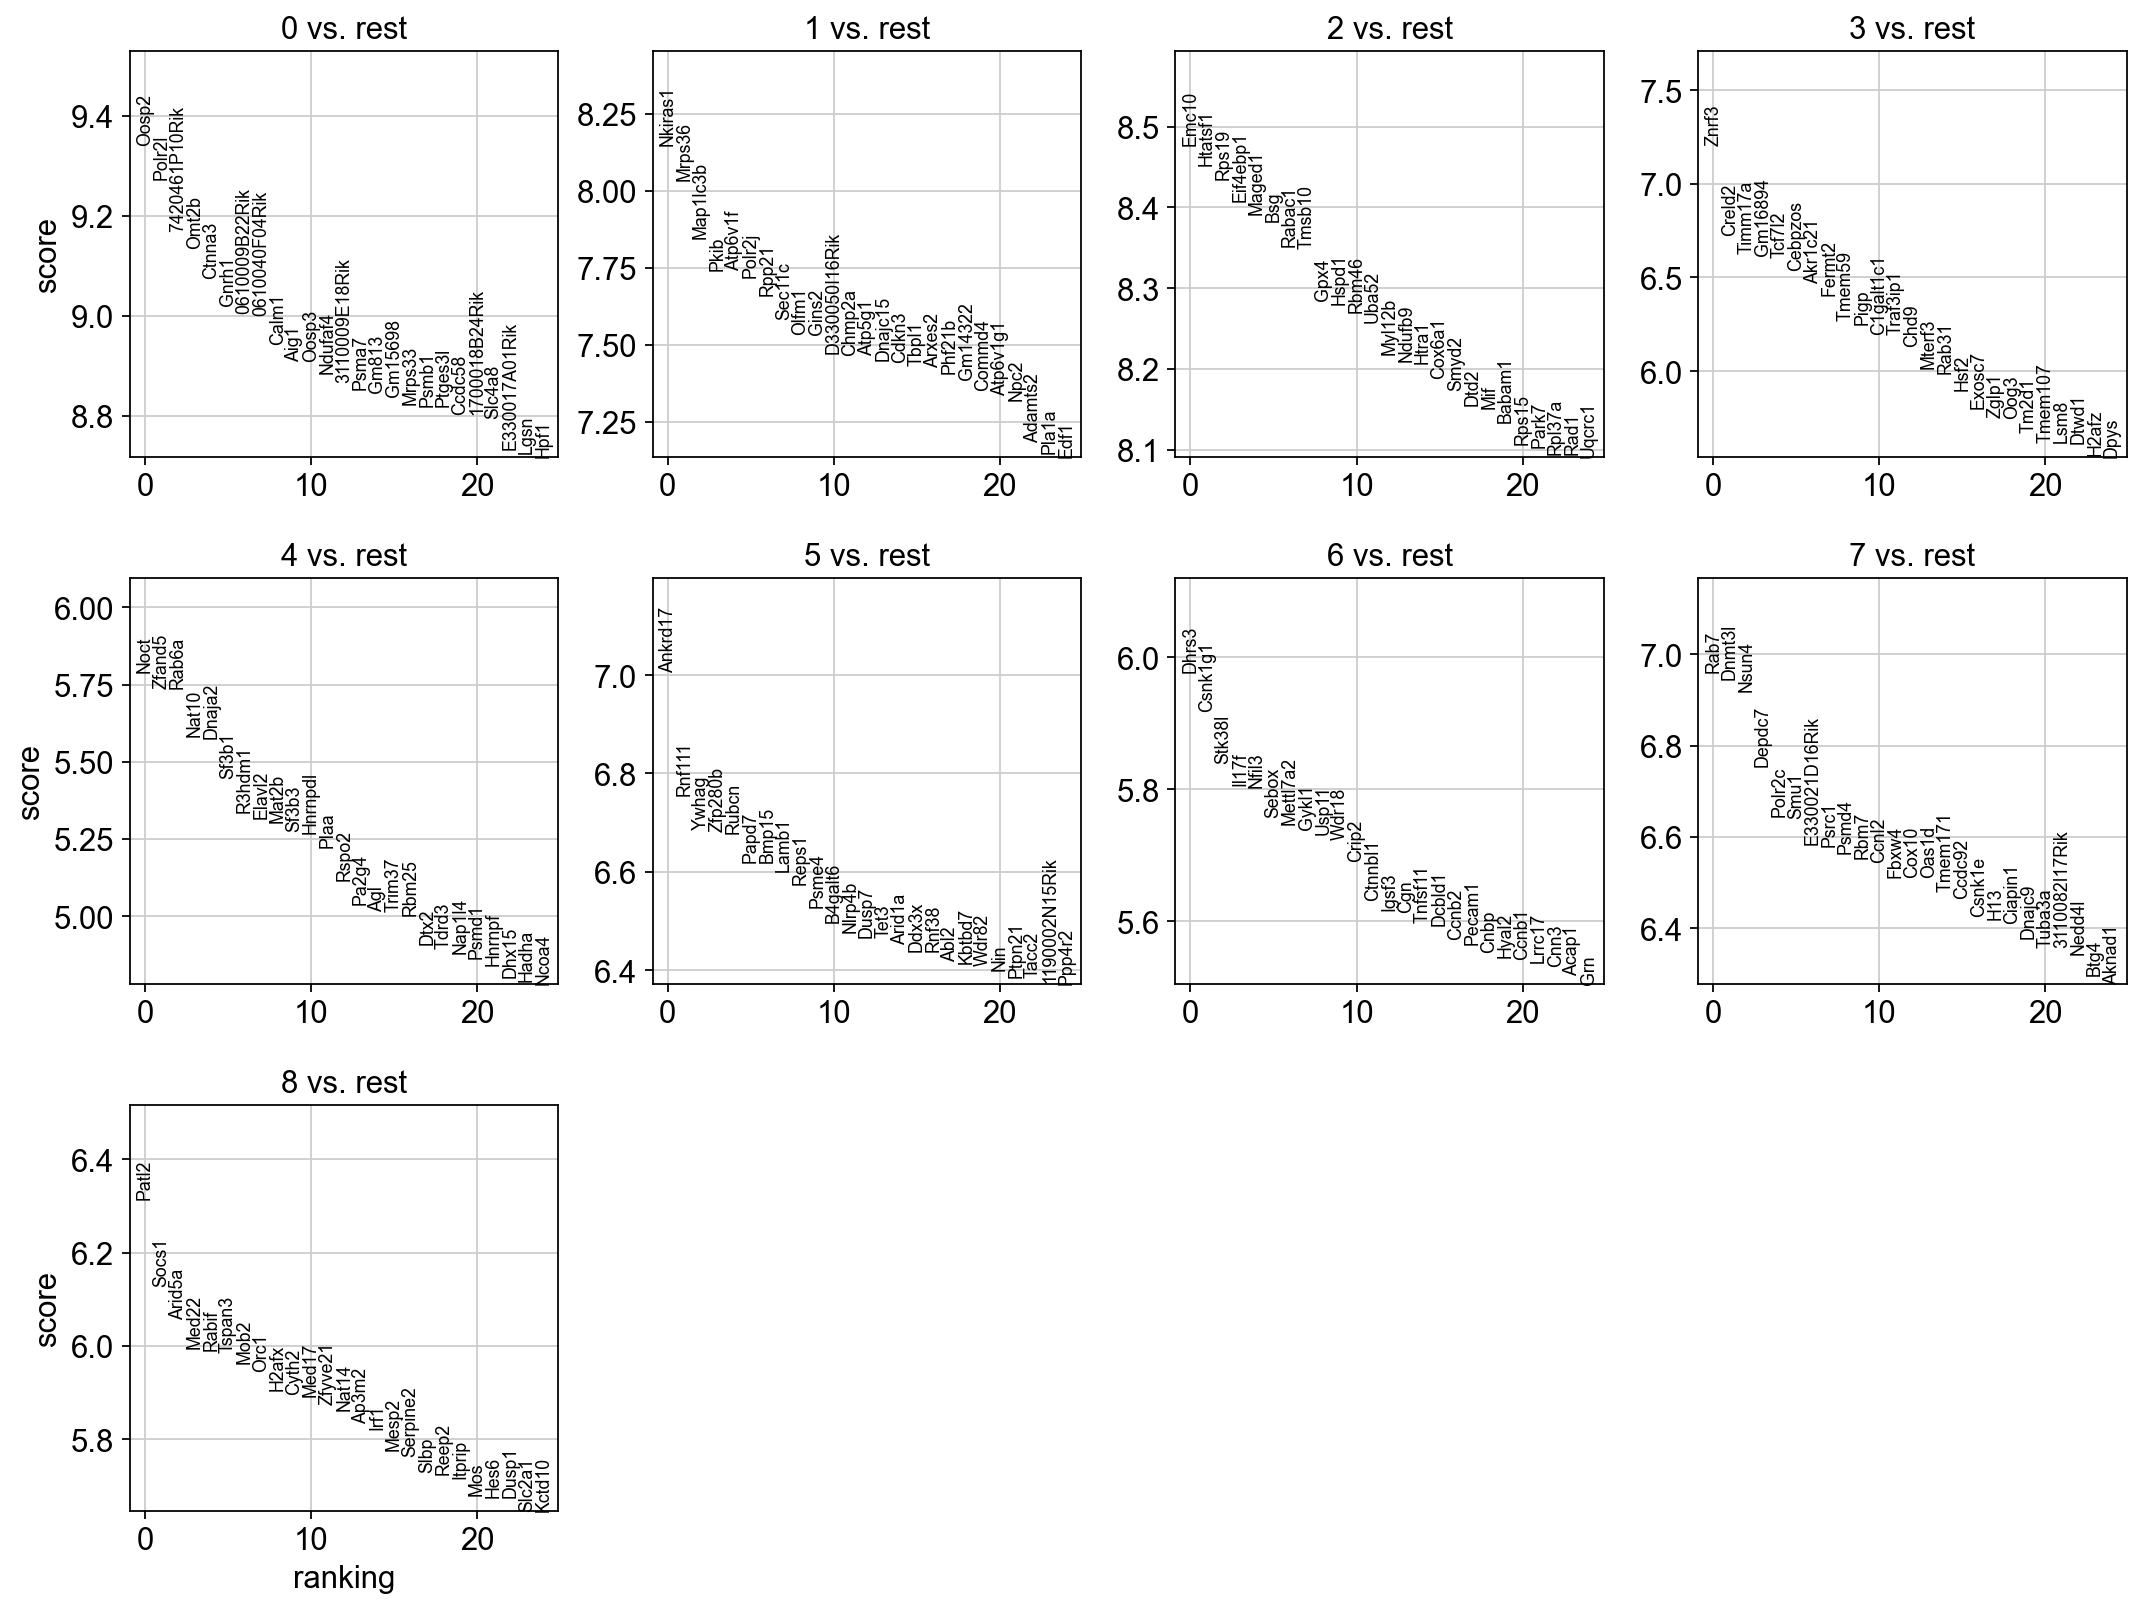

In [47]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished (0:00:00)


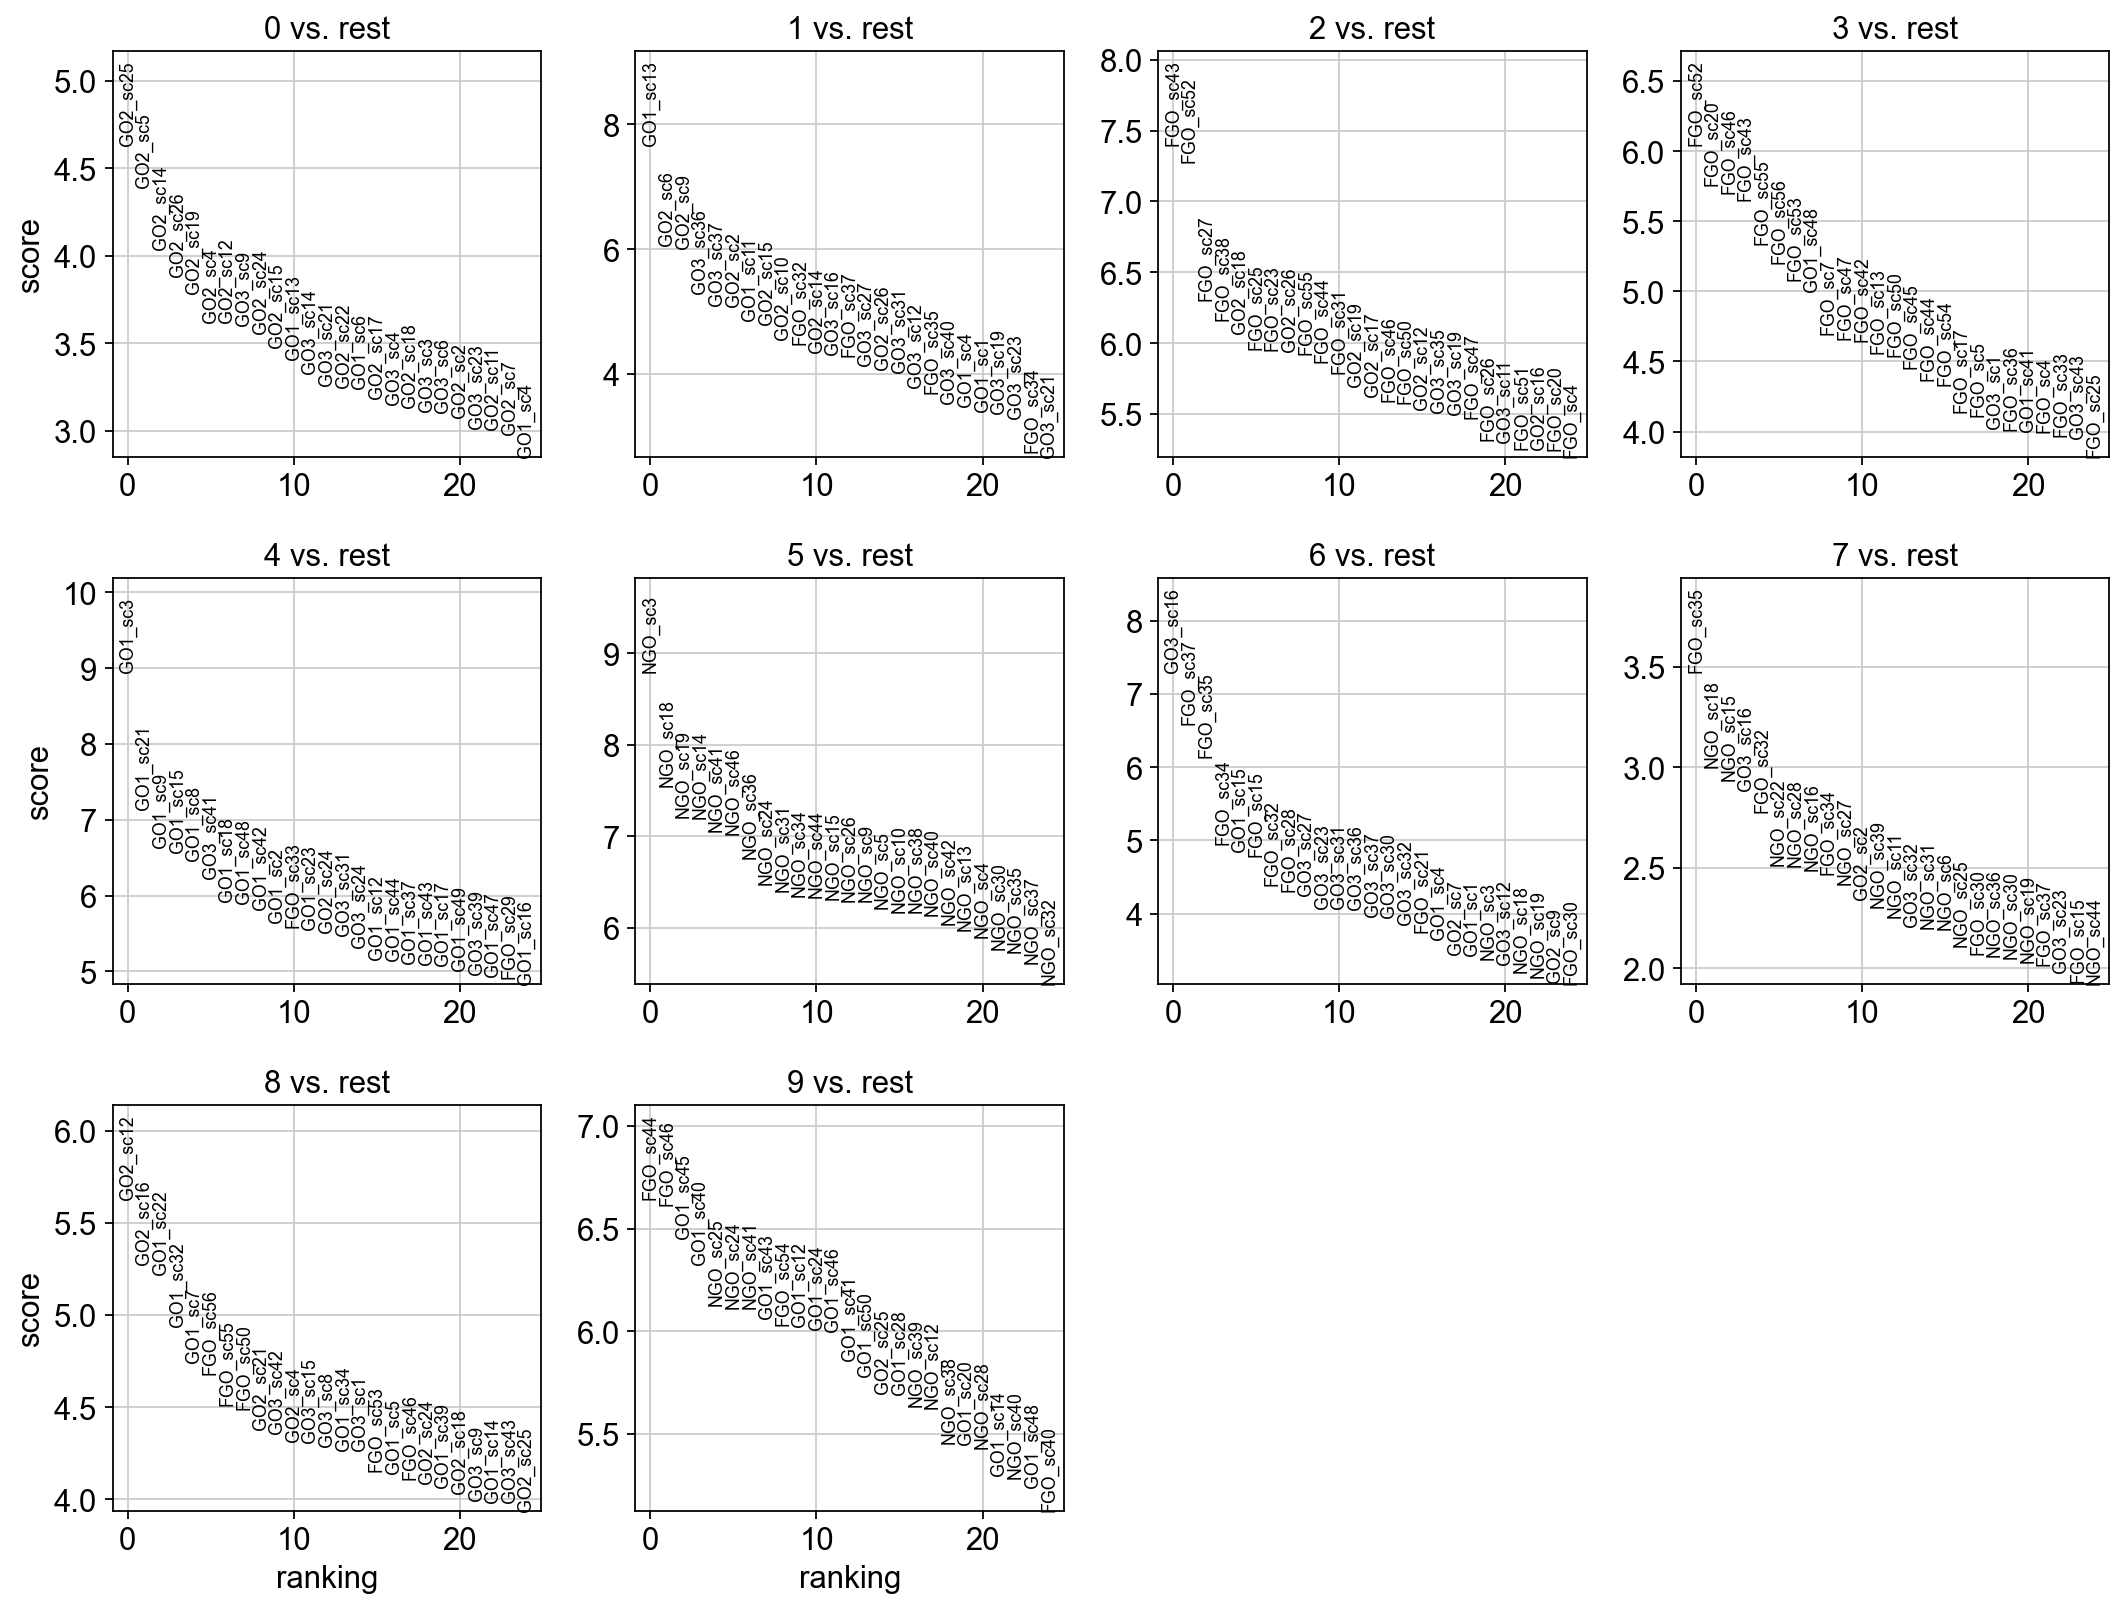

In [48]:
sc.tl.rank_genes_groups(adata2, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata2, n_genes=25, sharey=False)

ranking genes
    finished (0:00:03)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


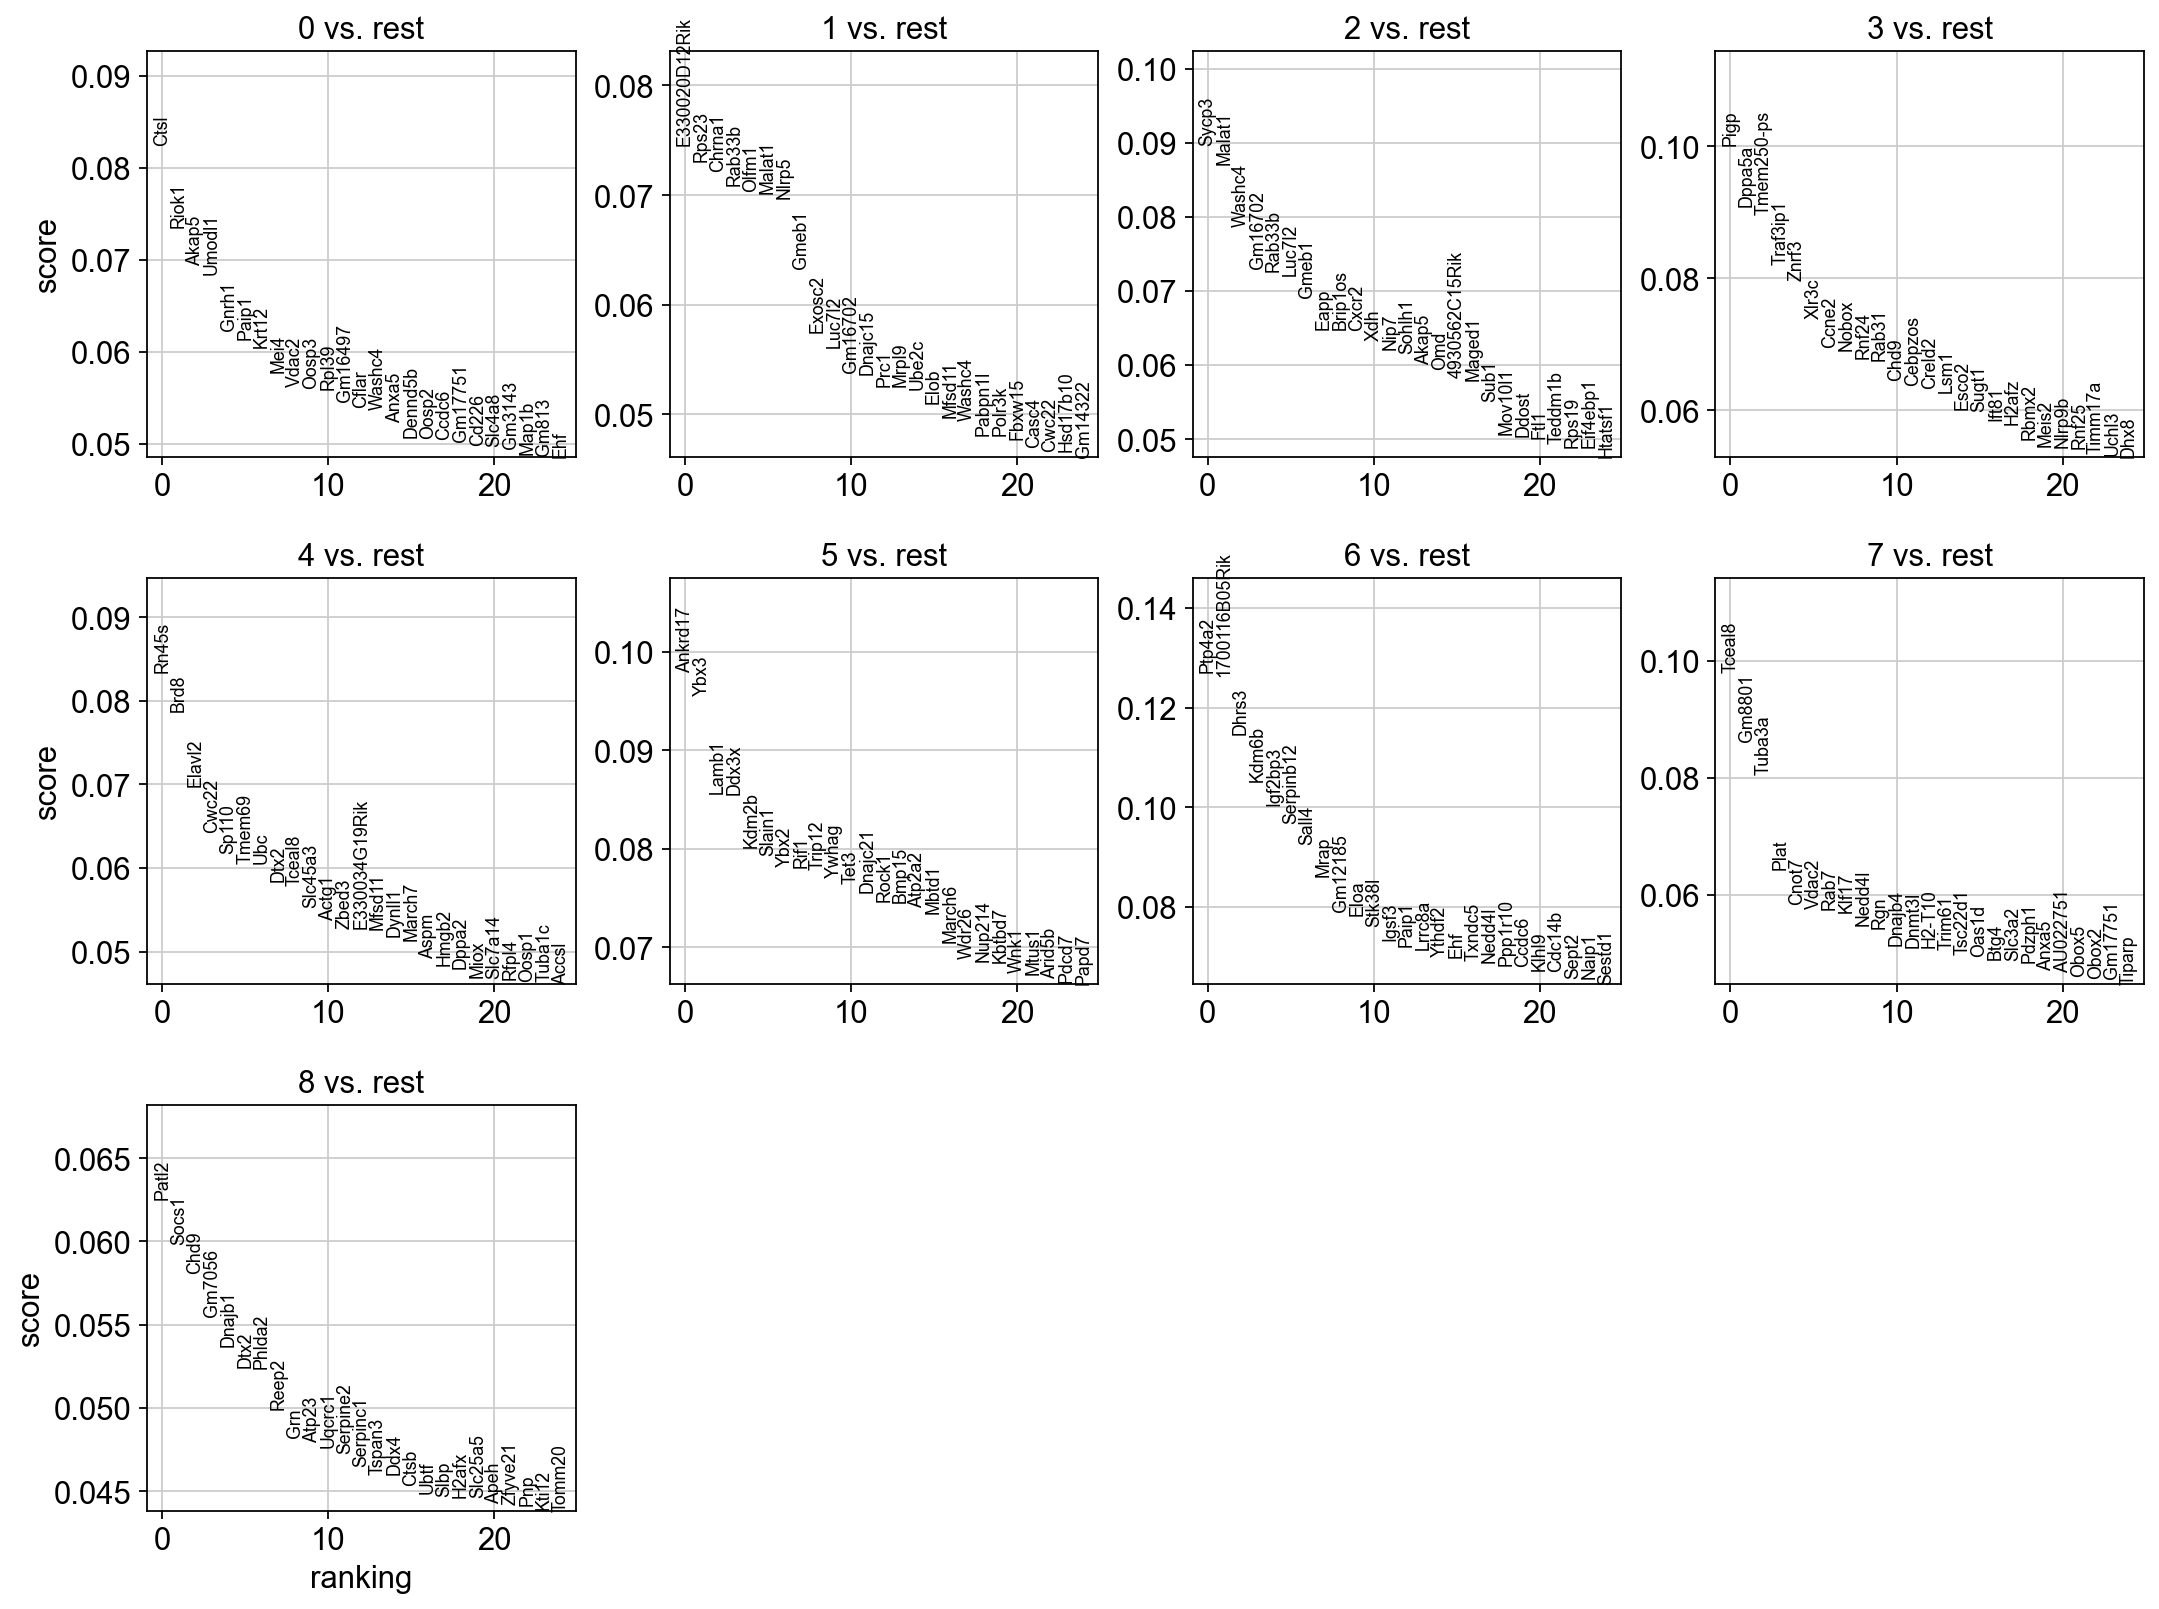

In [49]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')   
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished (0:00:00)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


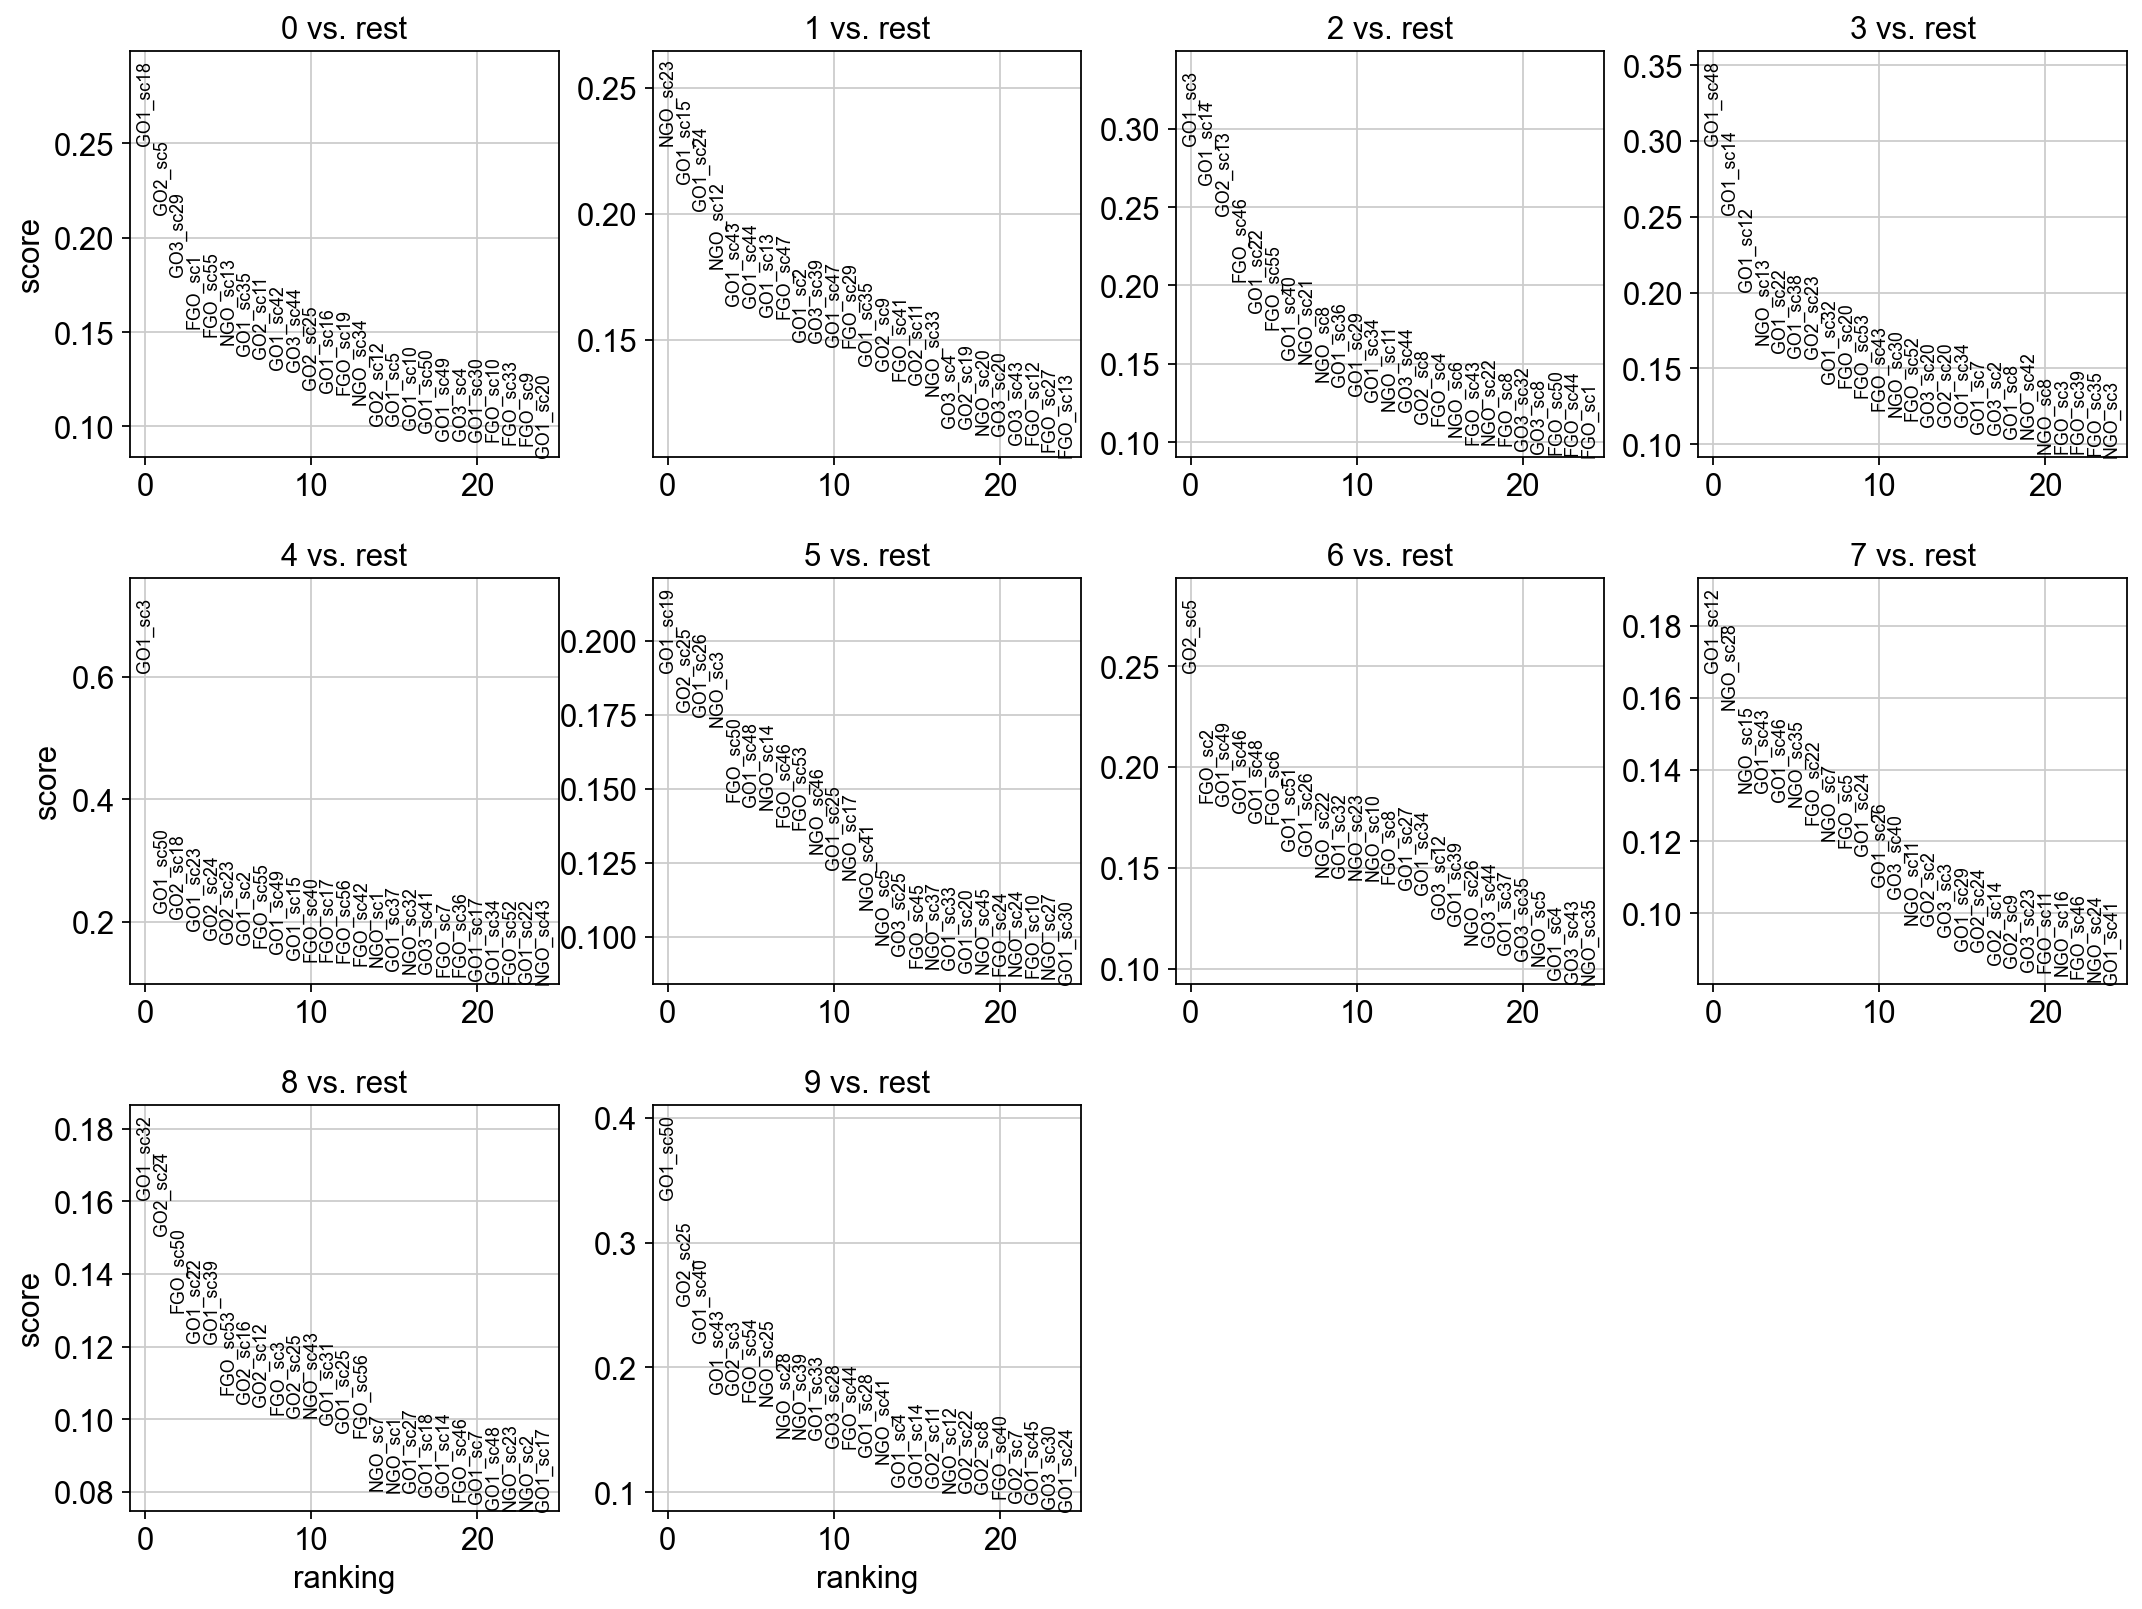

In [50]:
sc.tl.rank_genes_groups(adata2, 'leiden', method='logreg') ## logistische regression
sc.pl.rank_genes_groups(adata2, n_genes=25, sharey=False)

In [51]:
marker_genes = ['Gnrh1', 'Mrps36', 'Hspd1', 'Timm17a', 'Dnaja2',
                'Bmp15', 'Ctnnbl1', 'Nsun4', 'Patl2']

In [52]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)  ##show top 10 ranked genes per cluster

0              1        2           3       4        5              6  \
0    Ctsl  E330020D12Rik    Sycp3        Pigp   Rn45s  Ankrd17         Ptp4a2   
1   Riok1          Rps23   Malat1      Dppa5a    Brd8     Ybx3  1700116B05Rik   
2   Akap5         Chrna1   Washc4  Tmem250-ps  Elavl2    Lamb1          Dhrs3   
3  Umodl1         Rab33b  Gm16702    Traf3ip1   Cwc22    Ddx3x          Kdm6b   
4   Gnrh1          Olfm1   Rab33b       Znrf3   Sp110    Kdm2b        Igf2bp3   

        7       8  
0  Tceal8   Patl2  
1  Gm8801   Socs1  
2  Tuba3a    Chd9  
3    Plat  Gm7056  
4   Cnot7  Dnajb1

In [53]:
pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(5) 

0         1         2         3         4         5         6  \
0  GO1_sc18  NGO_sc23   GO1_sc3  GO1_sc48   GO1_sc3  GO1_sc19   GO2_sc5   
1   GO2_sc5  GO1_sc15  GO1_sc14  GO1_sc14  GO1_sc50  GO2_sc25   FGO_sc2   
2  GO3_sc29  GO1_sc24  GO2_sc13  GO1_sc12  GO2_sc18  GO1_sc26  GO1_sc49   
3   FGO_sc1  NGO_sc12  FGO_sc46  NGO_sc13  GO1_sc23   NGO_sc3  GO1_sc46   
4  FGO_sc55  GO1_sc43  GO1_sc22  GO1_sc22  GO2_sc24  FGO_sc50  GO1_sc48   

          7         8         9  
0  GO1_sc12  GO1_sc32  GO1_sc50  
1  NGO_sc28  GO2_sc24  GO2_sc25  
2  NGO_sc15  FGO_sc50  GO1_sc40  
3  GO1_sc43  GO1_sc22  GO1_sc43  
4  GO1_sc46  GO1_sc39   GO2_sc3

In [54]:
result = adata.uns['rank_genes_groups'] ##table with scores and groups
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','pvals']}).head(5)

KeyError: 'pvals'

ranking genes
    finished (0:00:00)


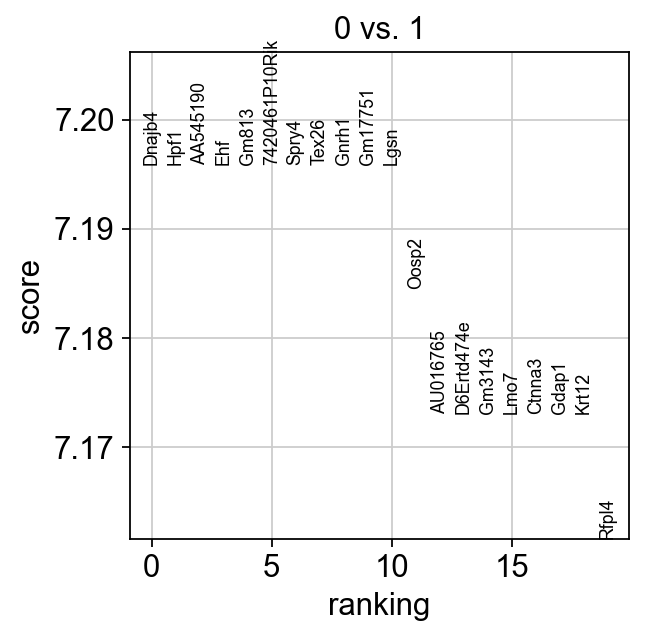

In [55]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon') ##compare to a single cluster
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

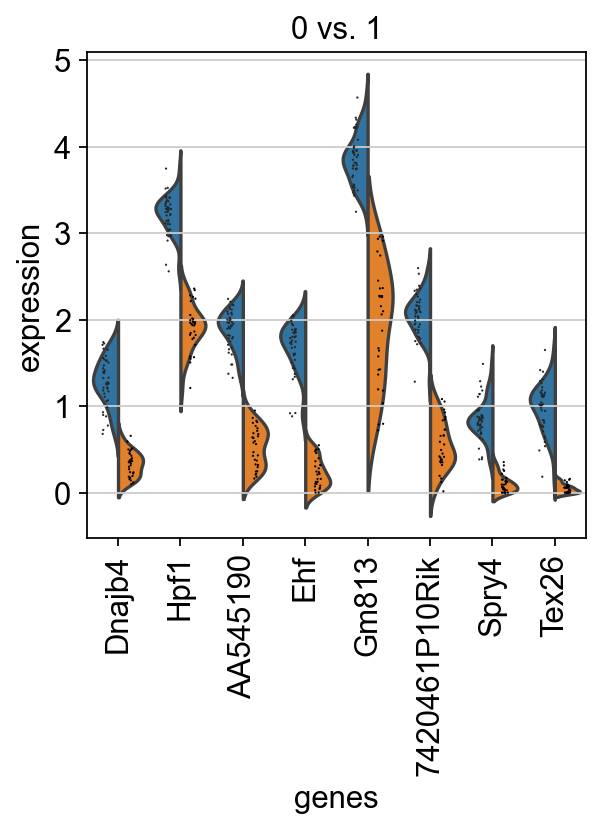

In [56]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8) ##more detailed view for a certain group

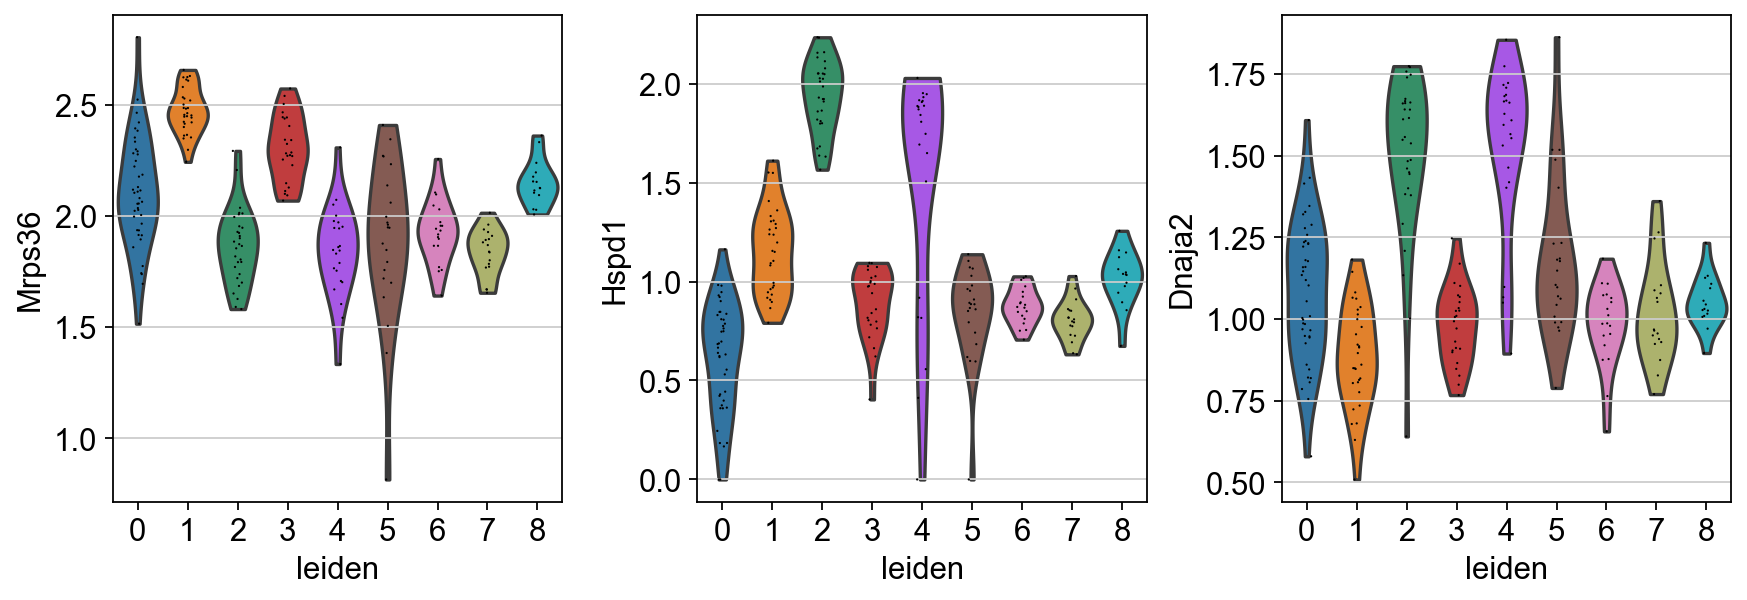

In [58]:
sc.pl.violin(adata, ['Mrps36', 'Hspd1', 'Dnaja2'], groupby='leiden') ##compare a certain gene across groups

In [59]:
new_cluster_names = ['GO2_sc5', 'GO1_sc13', 'GO2_sc17', 'GO1_sc48', 'GO1_sc3',
                     'NGO_sc3', 'GO3_sc16','GO1_sc22', 'GO1_sc50']
adata.rename_categories('leiden', new_cluster_names)

Omitting rank_genes_groups/names as old categories do not match.
Omitting rank_genes_groups/scores as old categories do not match.
Omitting rank_genes_groups/pvals as old categories do not match.
Omitting rank_genes_groups/pvals_adj as old categories do not match.
Omitting rank_genes_groups/logfoldchanges as old categories do not match.


In [ ]:
##sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

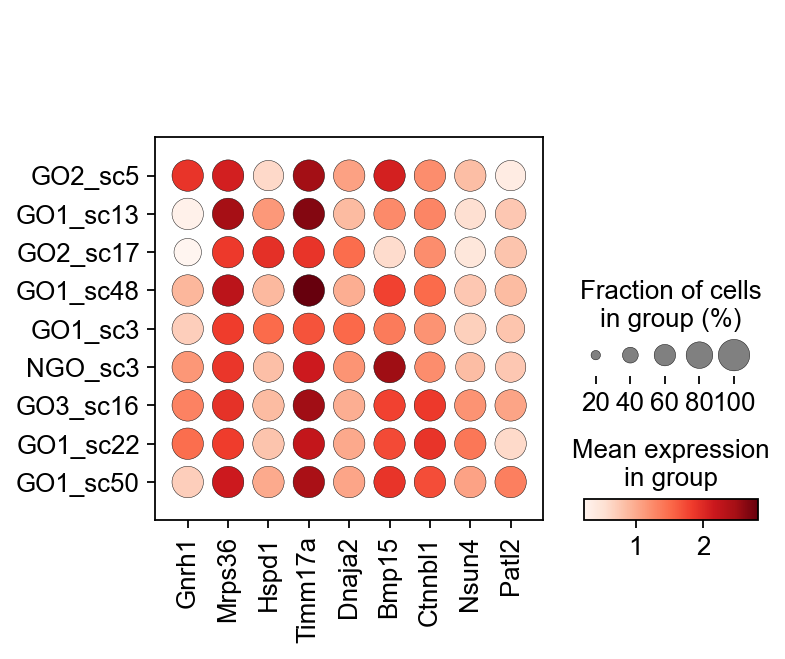

In [60]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');  ##visualize marker genes

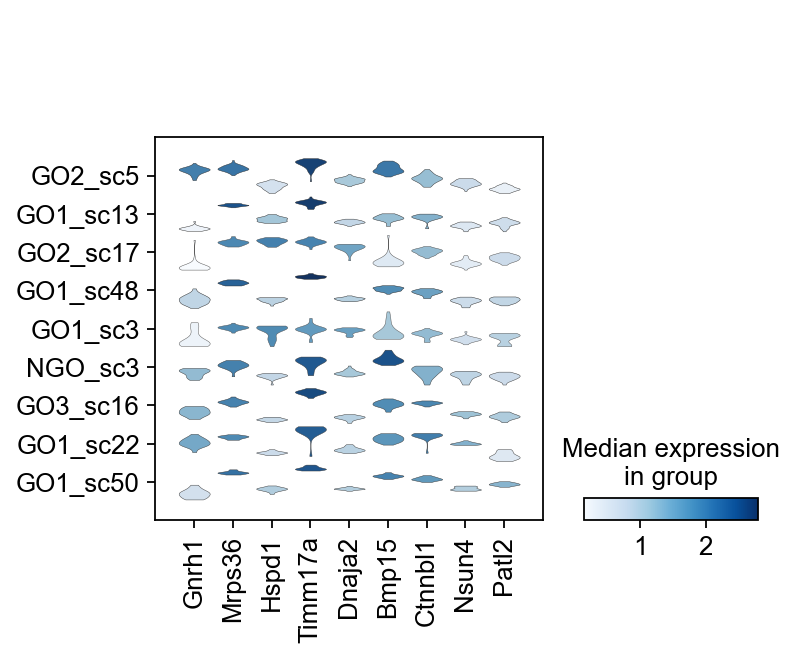

In [61]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90)

In [ ]:
##adata

In [ ]:
# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )